In [1]:
# import libraries

import numpy as np
import pandas as pd
import psycopg2

import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv
import warnings
warnings.filterwarnings("ignore")

In [2]:
# connect to Redshift
load dotenv()
load_dotenv()
dbname = os.getenv("dbname")
host = os.getenv("host")
port = os.getenv("port")
user = os.getenv("user")
password = os.getenv("password")

In [3]:
connect = psycopg2.connect(dbname=dbname, host=host, port=port, user=user, password=password)
cursor = connect.cursor()

In [4]:
query="""
select *
from bootcamp.online_transactions_cleaned
"""
online_trans_cleaned=pd.read_sql(query, connect)
online_trans_cleaned.head()


,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country
0,536381,37444A,YELLOW BREAKFAST CUP AND SAUCER,2.95,1,2.95,2010-12-01 09:41:00,u15311,United Kingdom
1,536384,22189,CREAM HEART CARD HOLDER,3.95,4,15.80,2010-12-01 09:53:00,u18074,United Kingdom
2,536390,22960,JAM MAKING SET WITH JARS,3.75,12,45.00,2010-12-01 10:19:00,u17511,United Kingdom
3,536392,21891,TRADITIONAL WOODEN SKIPPING ROPE,1.25,12,15.00,2010-12-01 10:29:00,u13705,United Kingdom
4,536396,82494L,WOODEN FRAME ANTIQUE WHITE,2.55,12,30.60,2010-12-01 10:51:00,u1785,United Kingdom


In [5]:
# top ten most popular geographical locations

online_trans_cleaned.groupby("country").customer_id.nunique().sort_values(ascending=False).head(10)

country
United Kingdom    3943
Germany             95
France              87
Spain               30
Belgium             25
Switzerland         21
Portugal            19
Italy               14
Finland             12
Austria             11
Name: customer_id, dtype: int64

In [6]:
# Which country spends the most?

online_trans_cleaned.groupby("country").total_order_value.sum().sort_values(ascending=False).head(1)


country
United Kingdom    6815375.093
Name: total_order_value, dtype: float64

In [7]:
# Visualize the distribution of Invoices per month

online_trans_cleaned["year"] = online_trans_cleaned["invoice_date"].dt.year
online_trans_cleaned["month"] = online_trans_cleaned["invoice_date"].dt.month
online_trans_cleaned.head()

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country,year,month
0,536381,37444A,YELLOW BREAKFAST CUP AND SAUCER,2.95,1,2.95,2010-12-01 09:41:00,u15311,United Kingdom,2010,12
1,536384,22189,CREAM HEART CARD HOLDER,3.95,4,15.80,2010-12-01 09:53:00,u18074,United Kingdom,2010,12
2,536390,22960,JAM MAKING SET WITH JARS,3.75,12,45.00,2010-12-01 10:19:00,u17511,United Kingdom,2010,12
3,536392,21891,TRADITIONAL WOODEN SKIPPING ROPE,1.25,12,15.00,2010-12-01 10:29:00,u13705,United Kingdom,2010,12
4,536396,82494L,WOODEN FRAME ANTIQUE WHITE,2.55,12,30.60,2010-12-01 10:51:00,u1785,United Kingdom,2010,12


In [8]:
online_trans_cleaned.year.value_counts()

2011    373594
2010     26247
Name: year, dtype: int64

In [9]:
year2010=online_trans_cleaned.loc[online_trans_cleaned["year"]==2010]
year2010.head()

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country,year,month
0,536381,37444A,YELLOW BREAKFAST CUP AND SAUCER,2.95,1,2.95,2010-12-01 09:41:00,u15311,United Kingdom,2010,12
1,536384,22189,CREAM HEART CARD HOLDER,3.95,4,15.80,2010-12-01 09:53:00,u18074,United Kingdom,2010,12
2,536390,22960,JAM MAKING SET WITH JARS,3.75,12,45.00,2010-12-01 10:19:00,u17511,United Kingdom,2010,12
3,536392,21891,TRADITIONAL WOODEN SKIPPING ROPE,1.25,12,15.00,2010-12-01 10:29:00,u13705,United Kingdom,2010,12
4,536396,82494L,WOODEN FRAME ANTIQUE WHITE,2.55,12,30.60,2010-12-01 10:51:00,u1785,United Kingdom,2010,12


In [10]:
year2011 = online_trans_cleaned.loc[online_trans_cleaned["year"]==2011]
year2011.head()

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country,year,month
6718,540014,84499,BLACK FLOWER CANDLE PLATE,0.85,6,5.1,2011-01-04 11:34:00,u14606,United Kingdom,2011,1
6719,540015,21877,HOME SWEET HOME MUG,1.25,12,15.0,2011-01-04 11:40:00,u13319,United Kingdom,2011,1
6720,540023,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,1.25,12,15.0,2011-01-04 12:58:00,u15039,United Kingdom,2011,1
6721,540027,21216,"SET 3 RETROSPOT TEA,COFFEE,SUGAR",4.95,4,19.8,2011-01-04 13:30:00,u1421,United Kingdom,2011,1
6722,540032,22722,SET OF 6 SPICE TINS PANTRY DESIGN,3.95,8,31.6,2011-01-04 13:50:00,u13397,United Kingdom,2011,1


In [11]:
year2010.month.value_counts()

12    26247
Name: month, dtype: int64

In [12]:
year2011.month.value_counts()

11    63974
10    49729
9     40289
5     28522
6     27459
3     27374
8     27309
7     27124
4     22885
1     21570
2     20045
12    17314
Name: month, dtype: int64

In [13]:
invoices_per_month = year2011.groupby("month").invoice.nunique()


In [14]:
invoices_per_month.min()

912

In [15]:
invoices_per_month.max()

3034

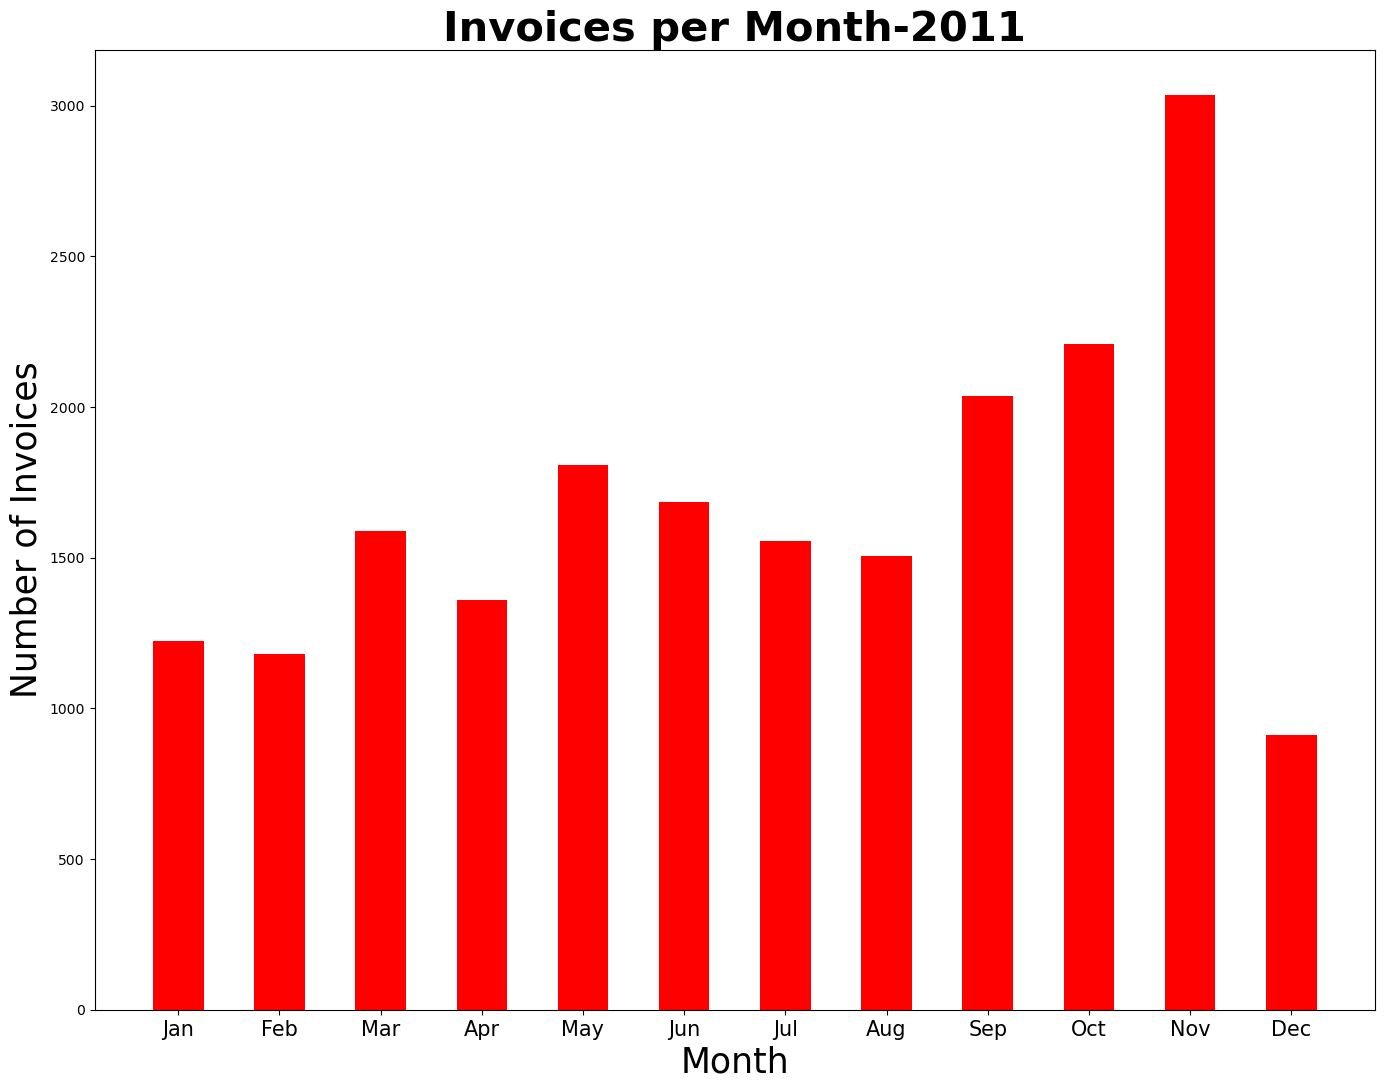

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2]) 
ax.bar(invoices_per_month.index, invoices_per_month, color="red", width=0.5)
ax.set_title('Invoices per Month-2011', fontsize=30, fontweight="bold")
ax.set_xticks(range(1,13))
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],fontsize=15)
ax.set_xlabel('Month', fontsize=25)
ax.set_ylabel("Number of Invoices",fontsize=25)
fig.show()

In [17]:
# for 2010:

invoices_per_month = year2010.groupby("month").invoice.nunique()



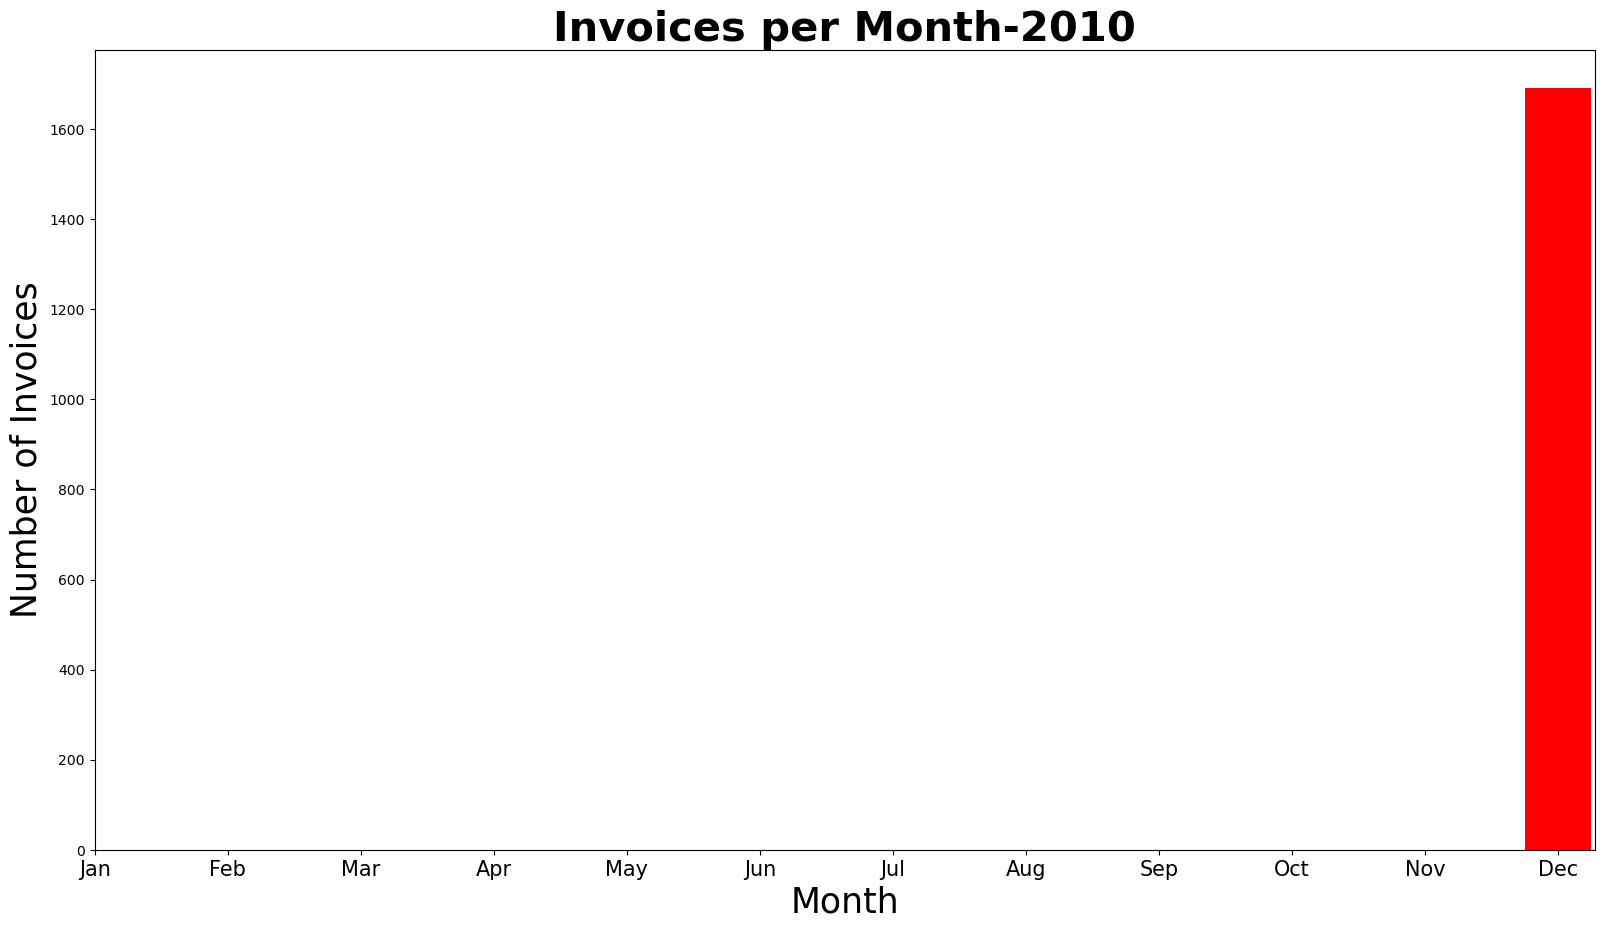

In [18]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0,0,1,1]) 
ax.bar(invoices_per_month.index, invoices_per_month, color="red", width=0.5)
ax.set_title('Invoices per Month-2010', fontsize=30, fontweight="bold")
ax.set_xticks(range(1,13))
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],fontsize=15)
ax.set_xlabel('Month', fontsize=25)
ax.set_ylabel("Number of Invoices",fontsize=25)
fig.show()


In [19]:
# Which day of week has the highest number of transactions?

year2010["day"] = year2010["invoice_date"].dt.weekday
year2010.head()

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country,year,month,day
0,536381,37444A,YELLOW BREAKFAST CUP AND SAUCER,2.95,1,2.95,2010-12-01 09:41:00,u15311,United Kingdom,2010,12,2
1,536384,22189,CREAM HEART CARD HOLDER,3.95,4,15.80,2010-12-01 09:53:00,u18074,United Kingdom,2010,12,2
2,536390,22960,JAM MAKING SET WITH JARS,3.75,12,45.00,2010-12-01 10:19:00,u17511,United Kingdom,2010,12,2
3,536392,21891,TRADITIONAL WOODEN SKIPPING ROPE,1.25,12,15.00,2010-12-01 10:29:00,u13705,United Kingdom,2010,12,2
4,536396,82494L,WOODEN FRAME ANTIQUE WHITE,2.55,12,30.60,2010-12-01 10:51:00,u1785,United Kingdom,2010,12,2


In [20]:
invoices_per_day = year2010.groupby("day").invoice.nunique()
invoices_per_day

day
0    262
1    242
2    367
3    458
4    200
6    163
Name: invoice, dtype: int64

In [21]:
invoices_per_day.min()

163

In [22]:
invoices_per_day.max()

458

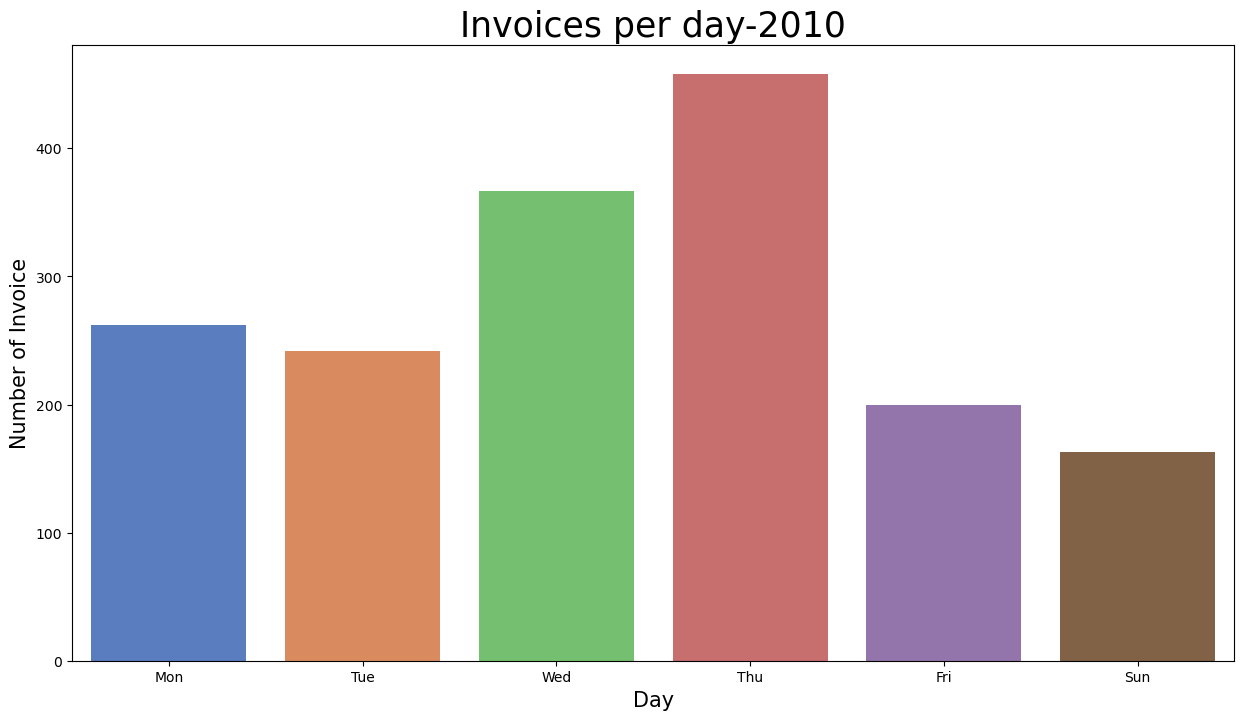

In [23]:
fig = plt.figure(figsize=(15,8))

ax = sns.barplot(x=invoices_per_day.index, y=invoices_per_day, palette="muted")
ax.set_xticks(range(0,6))
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sun'])
ax.set_title('Invoices per day-2010', fontsize=25)
ax.set_xlabel('Day', fontsize=15)
ax.set_ylabel("Number of Invoice",fontsize=15);


In [24]:
year2011["day"] = year2011["invoice_date"].dt.weekday
year2011.head()

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country,year,month,day
6718,540014,84499,BLACK FLOWER CANDLE PLATE,0.85,6,5.1,2011-01-04 11:34:00,u14606,United Kingdom,2011,1,1
6719,540015,21877,HOME SWEET HOME MUG,1.25,12,15.0,2011-01-04 11:40:00,u13319,United Kingdom,2011,1,1
6720,540023,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,1.25,12,15.0,2011-01-04 12:58:00,u15039,United Kingdom,2011,1,1
6721,540027,21216,"SET 3 RETROSPOT TEA,COFFEE,SUGAR",4.95,4,19.8,2011-01-04 13:30:00,u1421,United Kingdom,2011,1,1
6722,540032,22722,SET OF 6 SPICE TINS PANTRY DESIGN,3.95,8,31.6,2011-01-04 13:50:00,u13397,United Kingdom,2011,1,1


In [25]:
invoices_per_day = year2011.groupby("day").invoice.nunique()

In [26]:
invoices_per_day.min()

2171

In [27]:
invoices_per_day.max()

4430

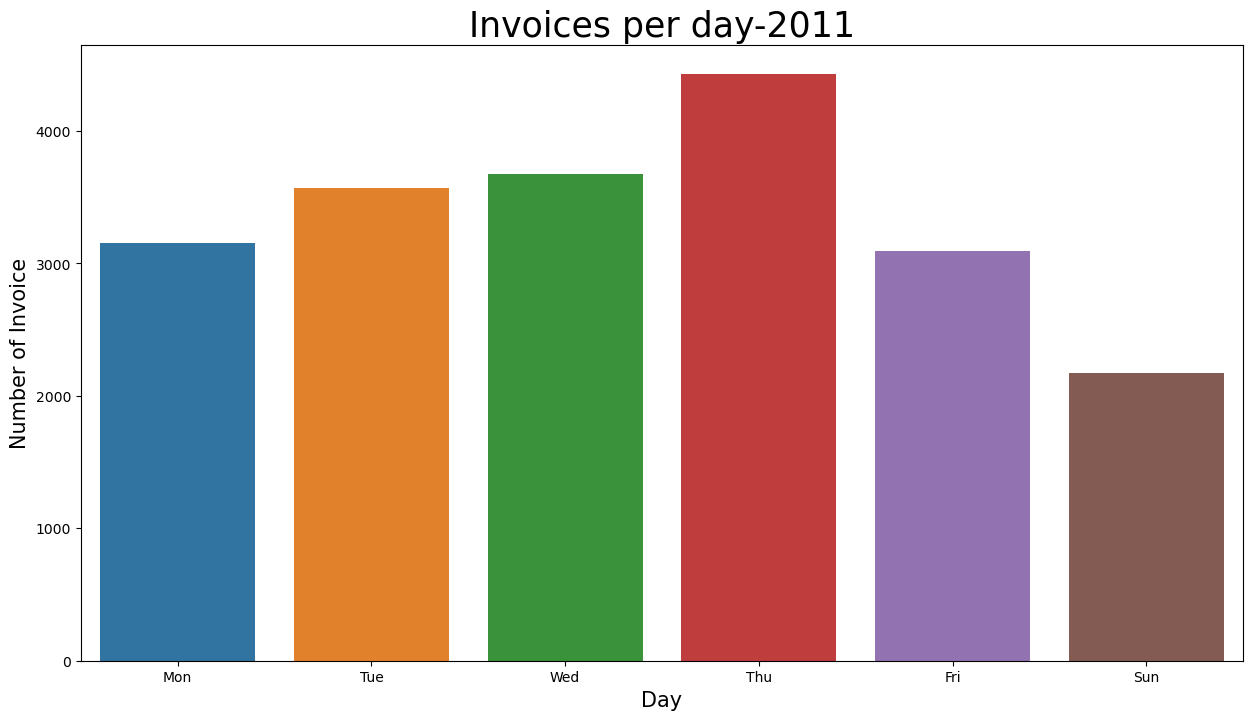

In [28]:
fig = plt.figure(figsize=(15,8))

ax = sns.barplot(x=invoices_per_day.index, y=invoices_per_day)
ax.set_xticks(range(0,6))
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sun'])
ax.set_title('Invoices per day-2011', fontsize=25)
ax.set_xlabel('Day', fontsize=15)
ax.set_ylabel("Number of Invoice",fontsize=15);

In [29]:
# Which customers have purchased the most?

online_trans_cleaned.groupby("customer_id").invoice.nunique().sort_values(ascending=False).head(10)

customer_id
u14911    243
u12748    217
u17841    169
u14606    125
u13089    118
u15311    118
u12971     88
u13408     75
u14646     74
u16029     66
Name: invoice, dtype: int64

In [30]:
# Which customers have spent the least amount?

online_trans_cleaned.groupby("customer_id").price.sum().sort_values().head(10)

customer_id
u13256    0.00
u15118    0.17
u12875    0.34
u13366    0.39
u17752    0.42
u14609    0.49
u15753    0.55
u18133    0.69
u16881    0.72
u13099    0.72
Name: price, dtype: float64

In [31]:
# Identify customers that have spent more than the average user.

avg_per_user = online_trans_cleaned.groupby("customer_id").total_order_value.sum().mean().round()
avg_per_user

1899.0

In [32]:
total_orders = online_trans_cleaned.groupby("customer_id").total_order_value.sum()
total_orders

customer_id
u12346       0.00
u12347    4310.00
u12348    1437.24
u12349    1457.55
u1235      294.40
           ...   
u1828      180.60
u18281      80.82
u18282     176.60
u18283    2039.58
u18287    1837.28
Name: total_order_value, Length: 4363, dtype: float64

In [33]:
users_above_avg = total_orders[total_orders > avg_per_user].index
users_above_avg

Index(['u12347', 'u12356', 'u12357', 'u12359', 'u1236', 'u12362', 'u1237',
       'u12378', 'u1238', 'u12388',
       ...
       'u18231', 'u18241', 'u18242', 'u18245', 'u18251', 'u18257', 'u18259',
       'u1826', 'u18272', 'u18283'],
      dtype='object', name='customer_id', length=901)

In [34]:
above_avg = online_trans_cleaned[online_trans_cleaned.customer_id.isin(users_above_avg)]
above_avg

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country,year,month
0,536381,37444A,YELLOW BREAKFAST CUP AND SAUCER,2.95,1,2.95,2010-12-01 09:41:00,u15311,United Kingdom,2010,12
2,536390,22960,JAM MAKING SET WITH JARS,3.75,12,45.00,2010-12-01 10:19:00,u17511,United Kingdom,2010,12
4,536396,82494L,WOODEN FRAME ANTIQUE WHITE,2.55,12,30.60,2010-12-01 10:51:00,u1785,United Kingdom,2010,12
7,536412,22961,JAM MAKING SET PRINTED,1.45,24,34.80,2010-12-01 11:49:00,u1792,United Kingdom,2010,12
16,536370,22900,SET 2 TEA TOWELS I LOVE LONDON,2.95,24,70.80,2010-12-01 08:45:00,u12583,France,2010,12
...,...,...,...,...,...,...,...,...,...,...,...
399831,581476,22728,ALARM CLOCK BAKELIKE PINK,3.75,8,30.00,2011-12-09 08:48:00,u12433,Norway,2011,12
399832,581476,21158,MOODY GIRL DOOR HANGER,0.39,24,9.36,2011-12-09 08:48:00,u12433,Norway,2011,12
399833,581478,22909,SET OF 20 VINTAGE CHRISTMAS NAPKINS,0.85,24,20.40,2011-12-09 08:59:00,u17364,United Kingdom,2011,12
399836,581495,15056N,EDWARDIAN PARASOL NATURAL,5.95,36,214.20,2011-12-09 10:20:00,u14051,United Kingdom,2011,12


In [35]:
# Aggregating data:

In [72]:
first_order = online_trans_cleaned.groupby("customer_id")["invoice_date"].min()
last_order = online_trans_cleaned.groupby("customer_id")["invoice_date"].max()

In [77]:
activity = pd.merge(first_order,last_order, on="customer_id", how="inner")
activity["customer_activity"] = abs(activity["invoice_date_x"]-activity["invoice_date_y"])
activity.head()

,invoice_date_x,invoice_date_y,customer_activity
customer_id,,,
u12346,2011-01-18 10:01:00,2011-01-18 10:17:00,0 days 00:16:00
u12347,2010-12-07 14:57:00,2011-12-07 15:52:00,365 days 00:55:00
u12348,2010-12-16 19:09:00,2011-09-25 13:13:00,282 days 18:04:00
u12349,2011-11-21 09:51:00,2011-11-21 09:51:00,0 days 00:00:00
u1235,2011-02-02 16:01:00,2011-02-02 16:01:00,0 days 00:00:00


In [78]:
non_returners = activity.loc[activity["invoice_date_x"] == activity["invoice_date_y"]]
non_returners.customer_activity.value_counts()

0 days    1329
Name: customer_activity, dtype: int64

In [79]:
non_returners_detail = pd.merge(non_returners, online_trans_cleaned, on="customer_id", how="left")
non_returners_detail.head()

,customer_id,invoice_date_x,invoice_date_y,customer_activity,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,country,year,month
0,u12349,2011-11-21 09:51:00,2011-11-21 09:51:00,0 days,577609,23439,HAND WARMER RED LOVE HEART,2.10,12,25.20,2011-11-21 09:51:00,Italy,2011,11
1,u12349,2011-11-21 09:51:00,2011-11-21 09:51:00,0 days,577609,21563,RED HEART SHAPE LOVE BUCKET,2.95,6,17.70,2011-11-21 09:51:00,Italy,2011,11
2,u12349,2011-11-21 09:51:00,2011-11-21 09:51:00,0 days,577609,21787,RAIN PONCHO RETROSPOT,0.85,24,20.40,2011-11-21 09:51:00,Italy,2011,11
3,u12349,2011-11-21 09:51:00,2011-11-21 09:51:00,0 days,577609,48185,DOORMAT FAIRY CAKE,8.25,4,33.00,2011-11-21 09:51:00,Italy,2011,11
4,u12349,2011-11-21 09:51:00,2011-11-21 09:51:00,0 days,577609,23494,VINTAGE DOILY DELUXE SEWING KIT,5.95,3,17.85,2011-11-21 09:51:00,Italy,2011,11
